# Using pure CNN's to classify cats vs dogs


In [1]:
import os
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

## Extract the file (manually or using zipfile module)

In [ ]:
import zipfile
# Extract the archive
zip_ref = zipfile.ZipFile("./data/cats_and_dogs.zip", 'r')
zip_ref.extractall("./data")
zip_ref.close()

## informtion about the dataset

In [2]:
source_path = './data/cats-and-dogs/PetImages/'

source_path_dogs = os.path.join(source_path, 'Dog')
source_path_cats = os.path.join(source_path, 'Cat')
print(f"There are {len(os.listdir(source_path_dogs))} images of dogs.")
print(f"There are {len(os.listdir(source_path_cats))} images of cats.")

There are 12500 images of dogs.
There are 12500 images of cats.


## create training and test subdirectory

In [3]:
root_dir = './data'
training_path = os.path.join(root_dir, "training")
test_path = os.path.join(root_dir, "validation")
training_path_cats = os.path.join(training_path, "cats")
training_path_dogs = os.path.join(training_path, "dogs")
test_path_cats = os.path.join(test_path, "cats")
test_path_dogs = os.path.join(test_path, "dogs")

if not os.path.exists(training_path):
    os.makedirs(training_path)
if not os.path.exists(test_path):
    os.makedirs(test_path)
if not os.path.exists(training_path_cats):
    os.makedirs(training_path_cats)
if not os.path.exists(training_path_dogs):
    os.makedirs(training_path_dogs)
if not os.path.exists(test_path_cats):
    os.makedirs(test_path_cats)
if not os.path.exists(test_path_dogs):
    os.makedirs(test_path_dogs)

## split the data

In [4]:
def split_data(source_dir, training_dir, testing_dir, split_size):
    files = []
    for filename in os.listdir(source_dir):
        file = os.path.join(source_dir, filename)
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + ' is zero length, so ignoring.')

    training_length = int(len(files) * split_size)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]

    for filename in training_set:
        src_file = os.path.join(source_dir, filename)
        dest_file = os.path.join(training_dir, filename)
        copyfile(src_file, dest_file)

    for filename in testing_set:
        src_file = os.path.join(source_dir, filename)
        dest_file = os.path.join(testing_dir, filename)
        copyfile(src_file, dest_file)

## Copy the image from the dataset (it can be removed after copy)

In [5]:
split_size = 0.9
split_data(source_path_cats, training_path_cats, test_path_cats, split_size)
split_data(source_path_dogs, training_path_dogs, test_path_dogs, split_size)

666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


## Check the information of the image

In [6]:
# Training and validation splits
print(f"There are {len(os.listdir(training_path_cats))} images of cats for training")
print(f"There are {len(os.listdir(training_path_dogs))} images of dogs for training")
print(f"There are {len(os.listdir(test_path_cats))} images of cats for validation")
print(f"There are {len(os.listdir(test_path_dogs))} images of dogs for validation")

There are 11249 images of cats for training
There are 11249 images of dogs for training
There are 1250 images of cats for validation
There are 1250 images of dogs for validation


## Standarize the size of the image

In [7]:
train_datagen = ImageDataGenerator(rescale=1.0 / 255.)
train_generator = train_datagen.flow_from_directory(directory=training_path, batch_size=100, class_mode='binary',
                                                    target_size=(150, 150))

validation_datagen = ImageDataGenerator(rescale=1.0 / 255.)
validation_generator = validation_datagen.flow_from_directory(directory=test_path, batch_size=100, class_mode='binary',
                                                              target_size=(150, 150))

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


## Create CNN model

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001),
            loss='binary_crossentropy',
            metrics=['accuracy'])

## Train the model

In [9]:
history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/15
 55/225 [======>.......................] - ETA: 2:10 - loss: 0.7931 - accuracy: 0.5362

D:\ApplicationApps\Python3.8\lib\site-packages\PIL\TiffImagePlugin.py:771: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  warnings.warn(
D:\ApplicationApps\Python3.8\lib\site-packages\PIL\TiffImagePlugin.py:771: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  warnings.warn(
D:\ApplicationApps\Python3.8\lib\site-packages\PIL\TiffImagePlugin.py:771: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  warnings.warn(
D:\ApplicationApps\Python3.8\lib\site-packages\PIL\TiffImagePlugin.py:771: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  warnings.warn(
D:\ApplicationApps\Python3.8\lib\site-packages\PIL\TiffImagePlugin.py:771: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 283
  warnings.warn(
D:\ApplicationApps\Python3.8\lib\s

225/225 [==============================] - 173s 768ms/step - loss: 0.6912 - accuracy: 0.6136 - val_loss: 0.5753 - val_accuracy: 0.7308
Epoch 2/15
225/225 [==============================] - 81s 361ms/step - loss: 0.5308 - accuracy: 0.7378 - val_loss: 0.4676 - val_accuracy: 0.7804
Epoch 3/15
225/225 [==============================] - 86s 384ms/step - loss: 0.4459 - accuracy: 0.7906 - val_loss: 0.5200 - val_accuracy: 0.7644
Epoch 4/15
225/225 [==============================] - 91s 406ms/step - loss: 0.3854 - accuracy: 0.8234 - val_loss: 0.4068 - val_accuracy: 0.8152
Epoch 5/15
225/225 [==============================] - 89s 396ms/step - loss: 0.3174 - accuracy: 0.8589 - val_loss: 0.4177 - val_accuracy: 0.8184
Epoch 6/15
225/225 [==============================] - 98s 435ms/step - loss: 0.2482 - accuracy: 0.8965 - val_loss: 0.4175 - val_accuracy: 0.8252
Epoch 7/15
225/225 [==============================] - 94s 416ms/step - loss: 0.1727 - accuracy: 0.9300 - val_loss: 0.4390 - val_accuracy: 0.

## Show the information about training

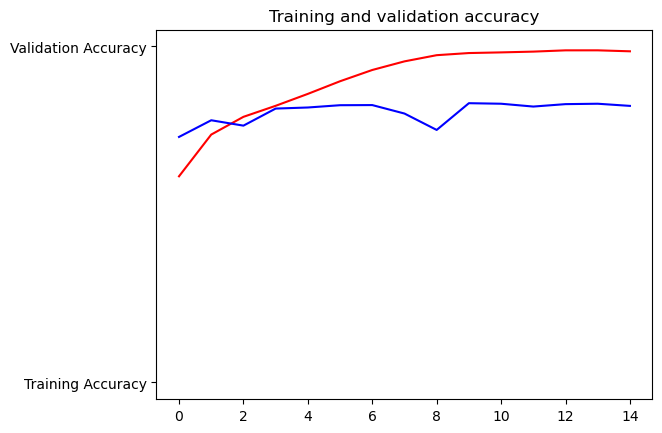

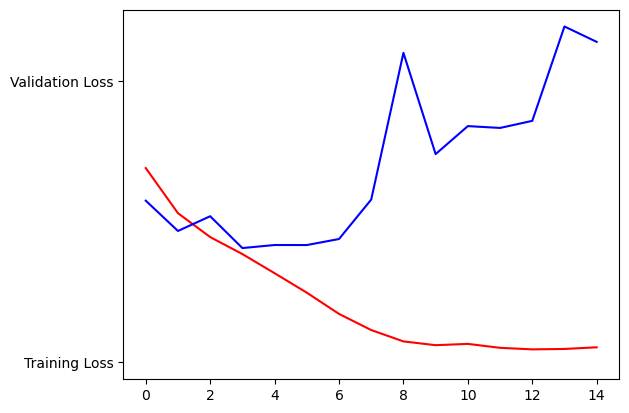

In [13]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()